In [1]:
# Dataset of 1978 survey to womans about extramatrimonial affairs
# http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

import statsmodels.api as sm
affairs_df = sm.datasets.fair.load_pandas().data
affairs_df.head()

"\nnombre_archivo = 'affairs_df_head.csv'\naffairs_df.head().to_csv(nombre_archivo, index=False)"

In [2]:
#creating a new categorical variable (affairs_binary)
affairs_df['affairs_binary'] = (affairs_df['affairs']>0)

In [3]:
#find linear correlations between variables and affaris_binary
affairs_df.corr()

<Axes: >

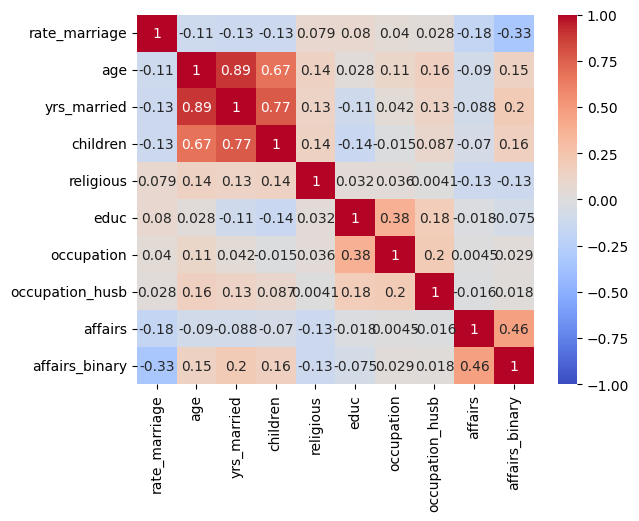

In [4]:
import seaborn as sns
sns.heatmap(affairs_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [6]:
affairs_X = affairs_df.drop(['affairs','affairs_binary'], axis = 1)
#dataframe without affairs and affairs_binary column

affairs_Y = affairs_df['affairs_binary']

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
#instance the model

from sklearn.model_selection import cross_val_score
#import validation module

#accuracy on the training test
scores = cross_val_score(model, affairs_X,affairs_Y, cv=10)

print(scores.mean(), "average accuracy")
#0.6580272602509798 average accuracy

print(scores.std(), "standard desviation") #low, the variance of the model is low
#0.018380845587135434 standard desviation

#Cross validation good

0.6591259145167501 average accuracy
0.019404611662770795 standard desviation


In [9]:
import pandas as pd

#Exploring variables with big impact like:
#rate_marriage, yrs_married and occupation_husb
#occupation_husb doesn't make sense because is on dominal level
model.fit(affairs_X, affairs_Y)
pd.DataFrame({'feature':affairs_X.columns, 'importance':model.feature_importances_}).sort_values('importance').tail(3)

,feature,importance
2,yrs_married,0.135834
0,rate_marriage,0.142236
7,occupation_husb,0.179158


In [10]:
#Dummy variables:
#Encoding nominal data using separate columns
occuptation_dummies = pd.get_dummies(affairs_df['occupation'], prefix='occ_').iloc[:, 1:]

#concatenate the dummy variable onto the original dataframe
affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1)
affairs_df.head().to_csv("nuevo.csv",index=False)

In [12]:
#Dummy variables for ocuppation_husb
#as before
occuptation_dummies = pd.get_dummies(affairs_df['occupation_husb'], prefix='occ_husb_').iloc[:, 1:]

affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1)
affairs_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affairs_binary,...,occ_husb__2.0,occ_husb__3.0,occ_husb__4.0,occ_husb__5.0,occ_husb__6.0,occ_husb__2.0,occ_husb__3.0,occ_husb__4.0,occ_husb__5.0,occ_husb__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,...,False,False,False,True,False,False,False,False,True,False
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,...,False,False,True,False,False,False,False,True,False,False
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,...,False,False,False,True,False,False,False,False,True,False
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,...,False,False,False,True,False,False,False,False,True,False
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,...,False,False,True,False,False,False,False,True,False,False


In [13]:
#remove appropiate columns for feature dataset
affairs_X = affairs_df.drop(['affairs','occupation','affairs_binary','occupation_husb'],axis=1)
affairs_Y = affairs_df['affairs_binary']

model = DecisionTreeClassifier()

#check the accuracy on the training set
scores = cross_val_score(model, affairs_X,affairs_Y,cv=10)
print(scores.mean(),"average accuracy")
print(scores.std(),"standard desviation") #low, variance on model low too


0.6542534285121886 average accuracy
0.021223317929915 standard desviation


In [15]:
#Exploring individual features with biggest impact
model.fit(affairs_X,affairs_Y)
pd.DataFrame({'feature':affairs_X.columns,'importance':model.feature_importances_}).sort_values('importance').tail(10)

,feature,importance
9,occ__5.0,0.022548
8,occ__4.0,0.022682
13,occ_husb__4.0,0.025604
7,occ__3.0,0.028311
4,religious,0.099292
1,age,0.114036
2,yrs_married,0.129129
5,educ,0.130637
3,children,0.131288
0,rate_marriage,0.139632
